In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
pimg1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/1.png')  
pimg2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/2.png') 

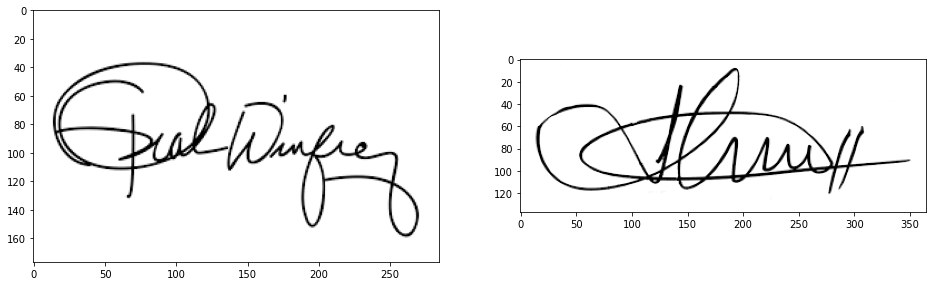

In [3]:
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(pimg1, cmap='gray')
ax[1].imshow(pimg2, cmap='gray')

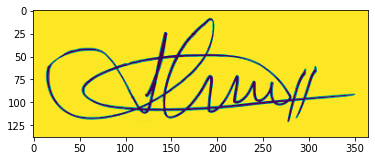

In [4]:
img1 = cv2.cvtColor(pimg1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(pimg2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2)

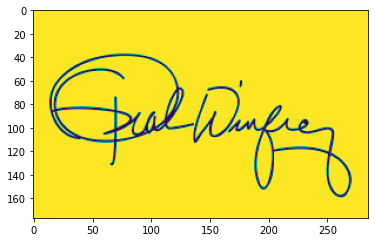

In [5]:
plt.imshow(img1)

In [6]:
sift = cv2.SIFT_create()

In [7]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

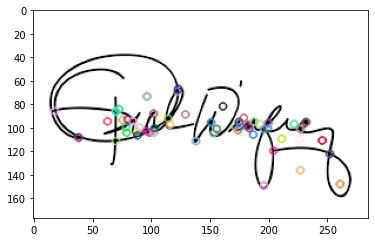

In [8]:
img_1 = cv2.drawKeypoints(img1,keypoints_1,pimg1)
plt.imshow(img_1)

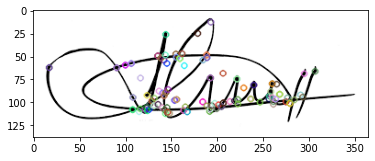

In [9]:
img_2 = cv2.drawKeypoints(img2,keypoints_2,pimg2)
plt.imshow(img_2)

In [10]:
len(keypoints_1), len(keypoints_2)

(75, 136)

In [11]:
featurlist =[]
featurlist += [keypoints_2, descriptors_2]
bf = cv2.BFMatcher()

In [12]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

In [13]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

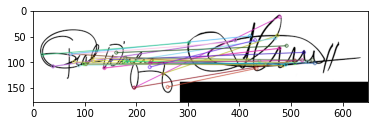

(<matplotlib.image.AxesImage at 0x7fd4e48f80a0>, None)

In [14]:
plt.imshow(img3),plt.show()

In [15]:
len(matches)

27

In [16]:
def check():
  good = []
  c = 0
  for m in matches:
        good.append([m])
        a=len(good)
        percent=(a*100)/len(keypoints_2)
        if percent >= 75.00:
          c=1
        if percent < 75.00:
          c=0
  return percent,c;

In [23]:
percent, c = check()
print("MATCH SCORE:-\n")
if(c == 1):
  print("{} % similarity".format(percent))
  print("MATCH FOUND")
else:
  print("{} % similarity".format(percent))
  print("MATCH NOT FOUND")

MATCH SCORE:-

19.852941176470587 % similarity
MATCH NOT FOUND
